# AIM: `We will classifiy the customers who will stay in our bank or leave the bank using deep learning approach.`

`Data Description:`

- Customer ID: A unique identifier for each customer

- Surname: The customer's surname or last name

- Credit Score: A numerical value representing the customer's credit score

- Geography: The country where the customer resides

- Gender: The customer's gender

- Age: The customer's age.

- Tenure: The number of years the customer has been with the bank

- Balance: The customer's account balance

- NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)

- HasCrCard: Whether the customer has a credit card

- IsActiveMember: Whether the customer is an active member

- EstimatedSalary: The estimated salary of the customer

- Exited: Whether the customer has churned (Target Variable)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## EDA


In [3]:
df.shape


(10000, 14)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# check for duplicates
df.duplicated().sum()

0

In [8]:
# make sure there are no missing values
df.isnull().sum().sum()

0

In [9]:
# select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

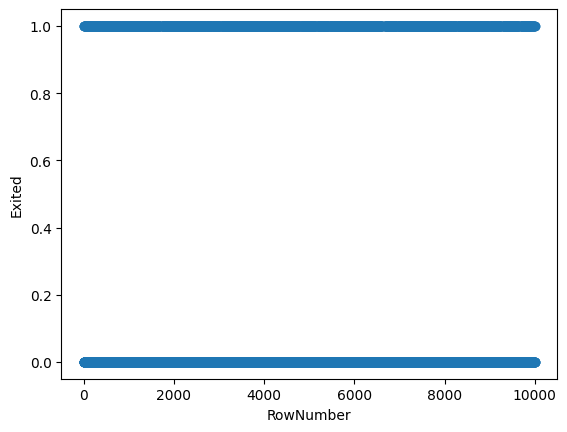

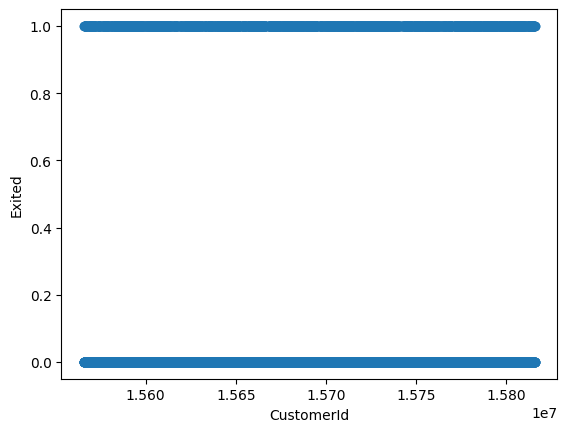

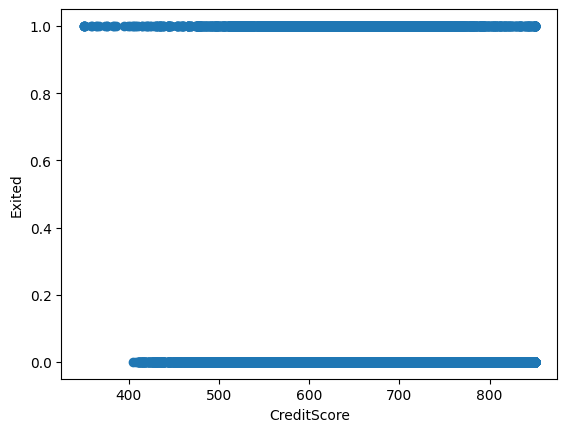

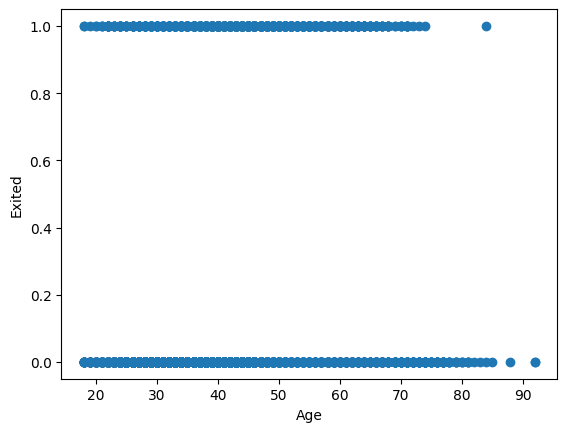

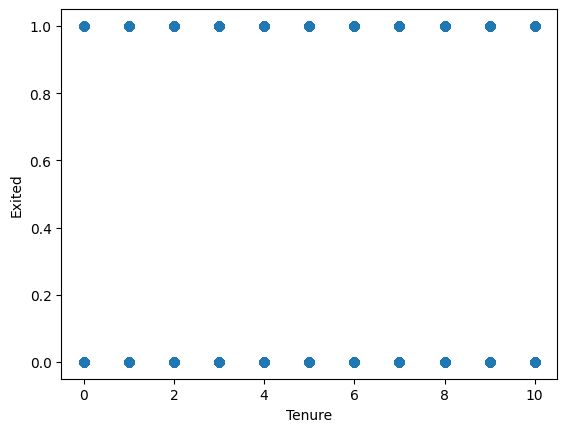

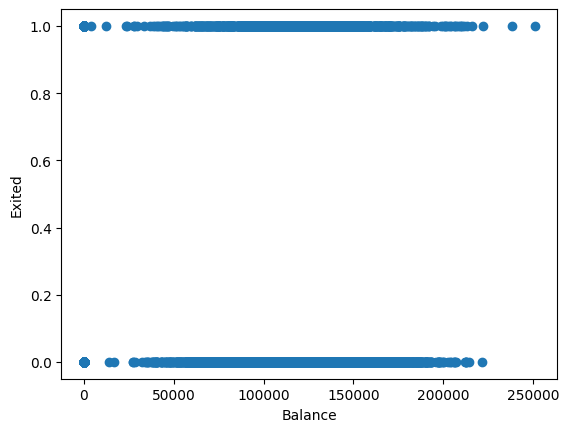

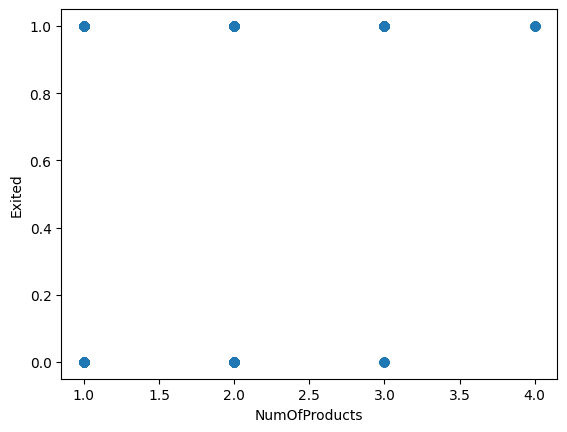

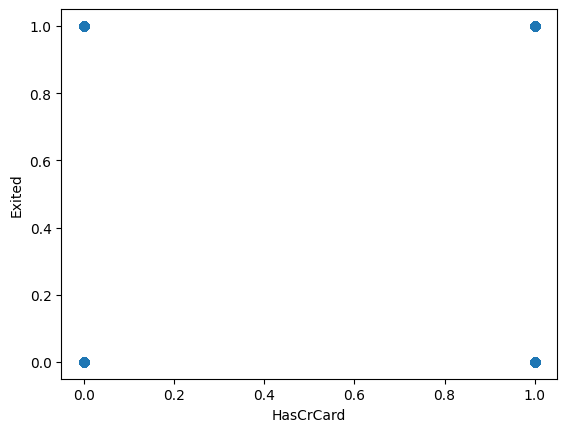

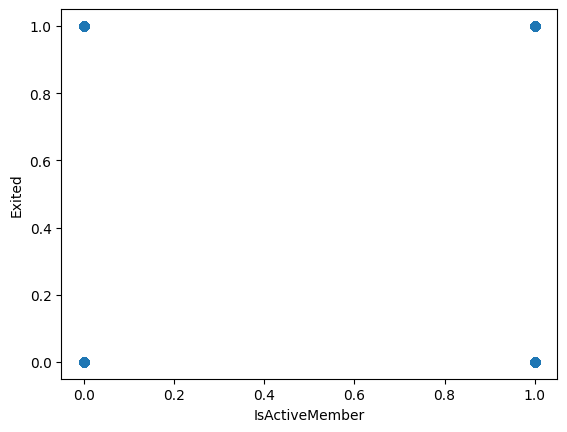

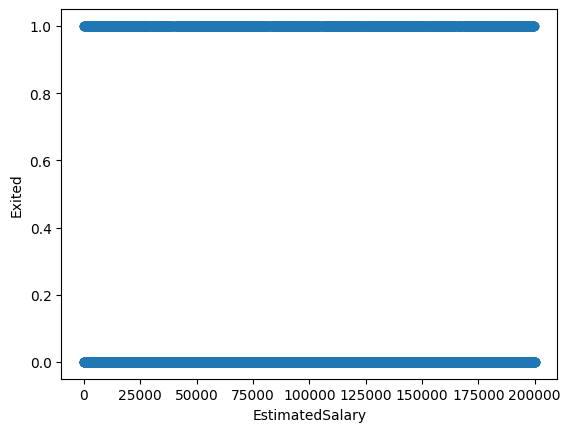

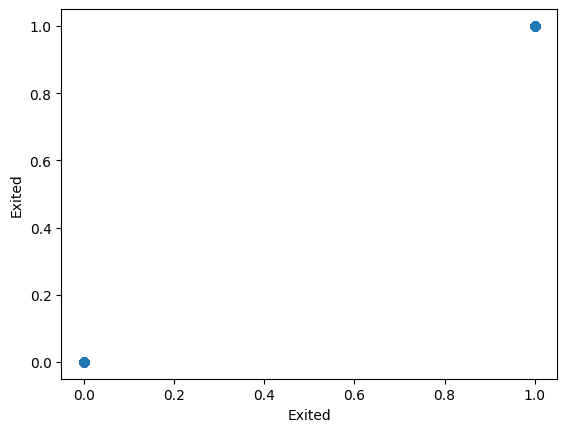

In [10]:
# plot scatter plot for all numeric columns
for col in numeric_cols:
    plt.scatter(df[col], df['Exited'])
    plt.xlabel(col)
    plt.ylabel('Exited')
    plt.show()

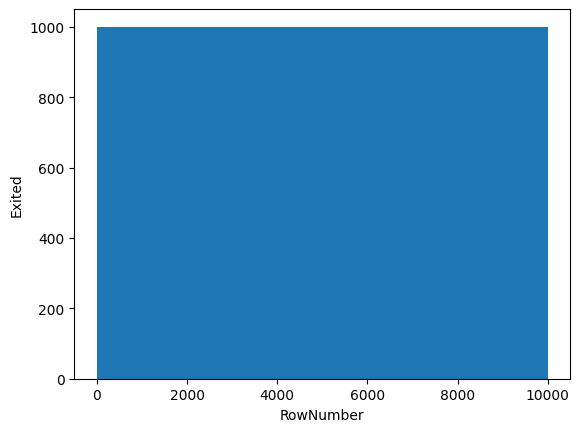

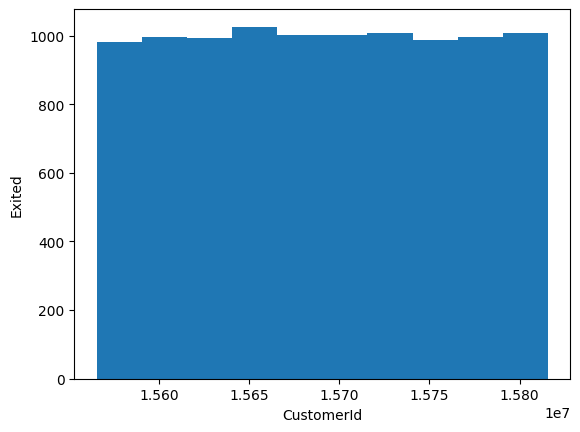

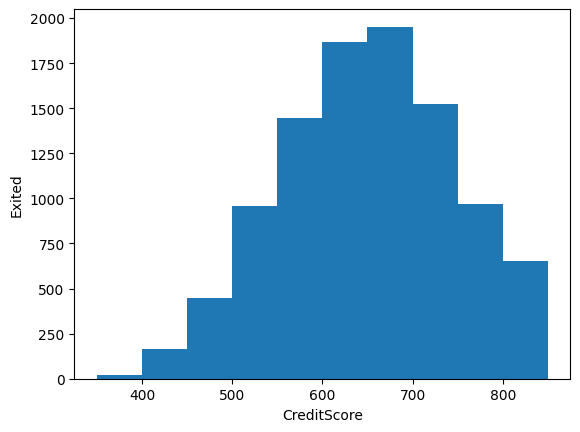

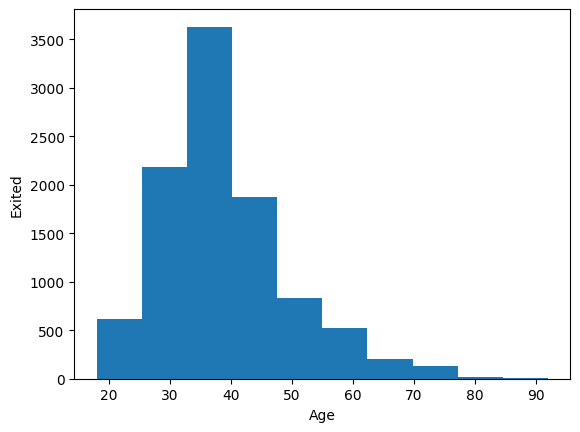

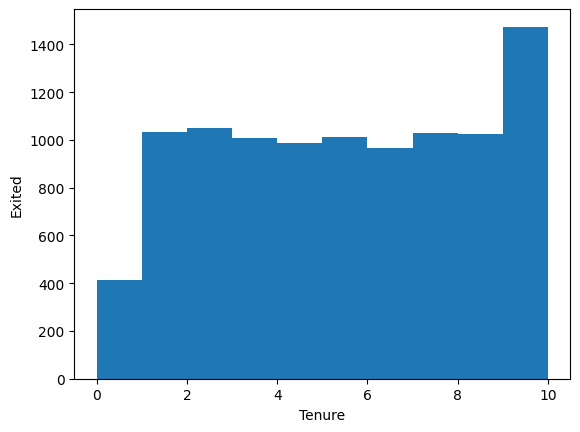

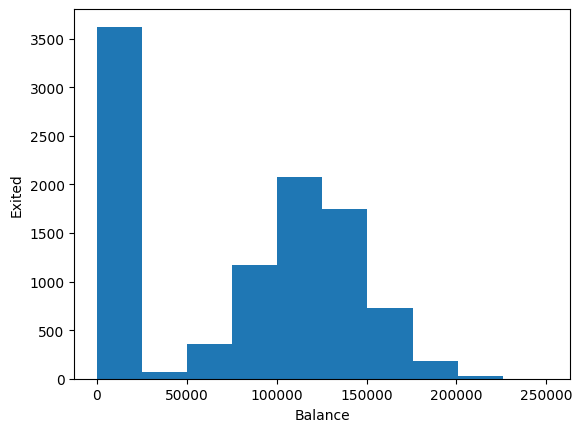

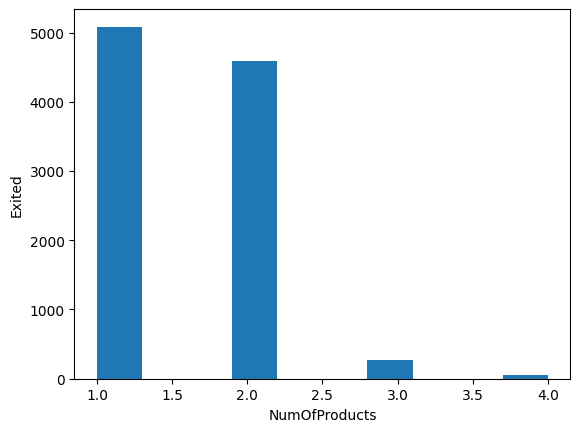

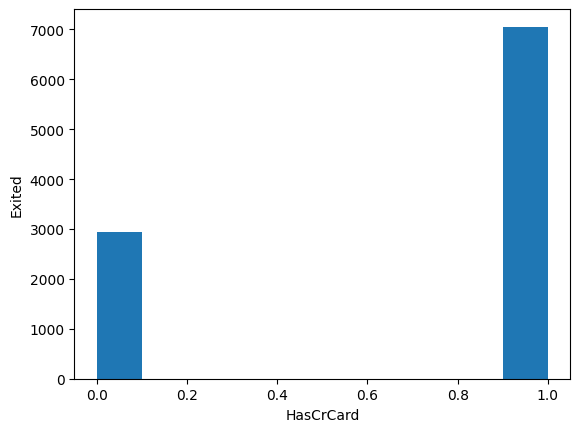

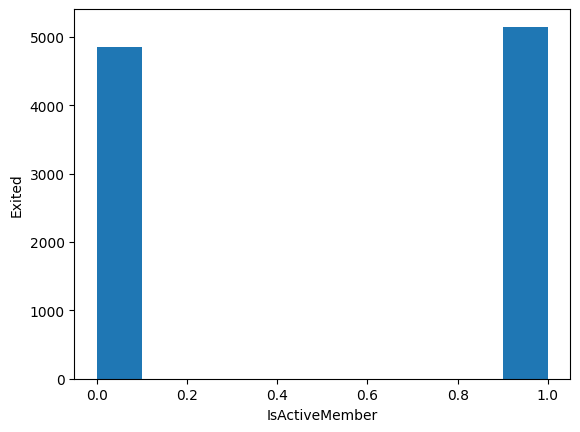

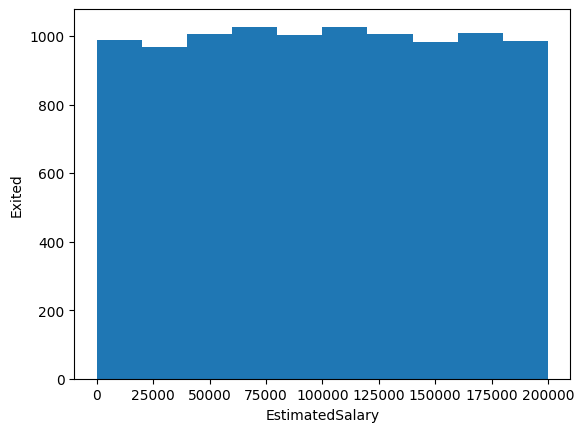

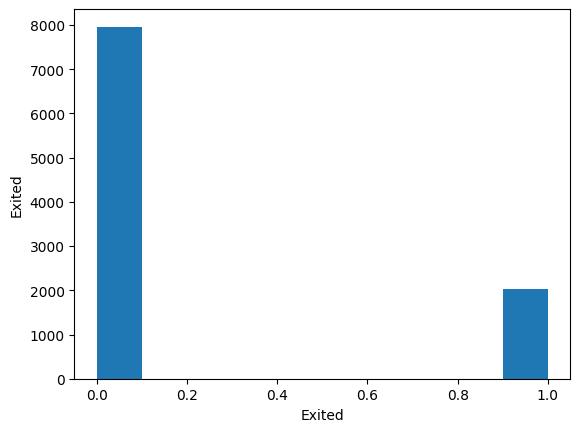

In [11]:
# plot dist plot for all numeric columns
for col in numeric_cols:
    plt.hist(df[col])
    plt.xlabel(col)
    plt.ylabel('Exited')
    plt.show()

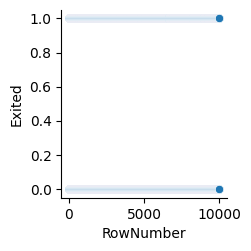

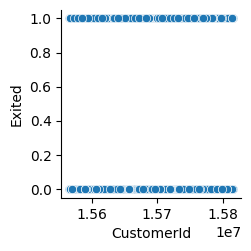

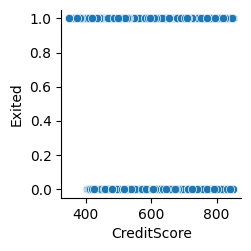

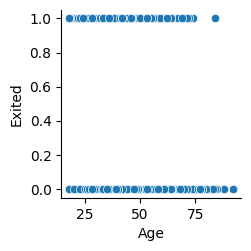

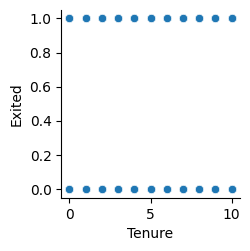

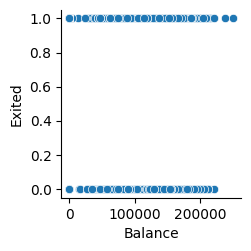

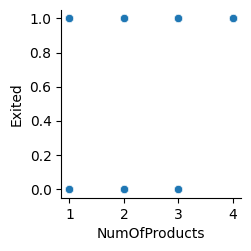

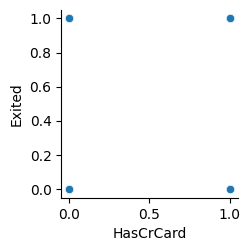

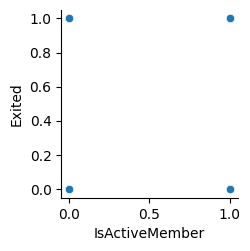

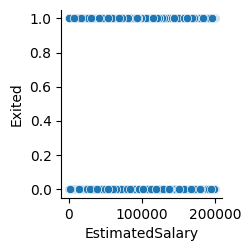

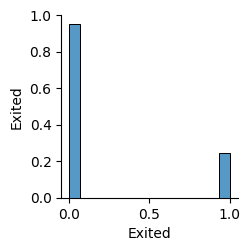

In [12]:
# plot pair plot for all numeric columns
for col in numeric_cols:
    sns.pairplot(df, x_vars=col, y_vars='Exited')
    plt.show()

In [13]:
# select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Surname', 'Geography', 'Gender'], dtype='object')

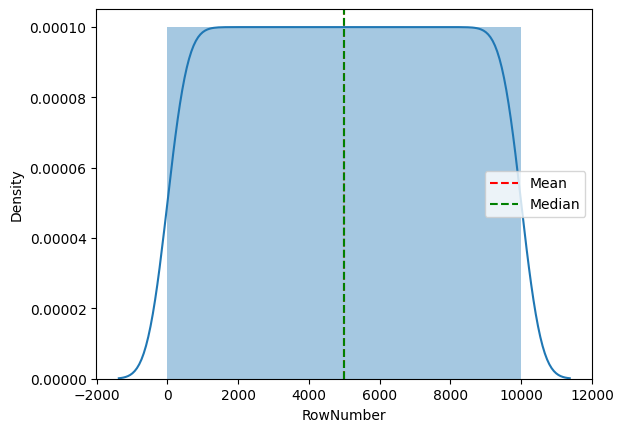

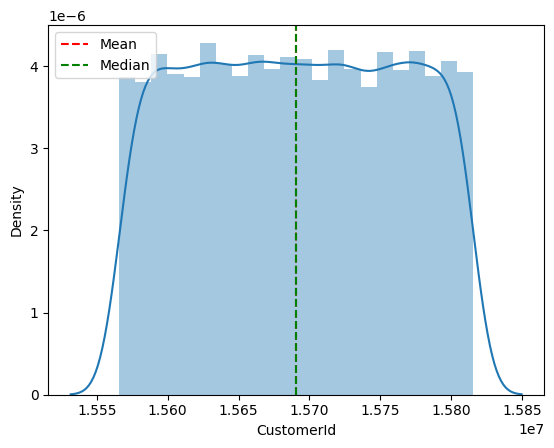

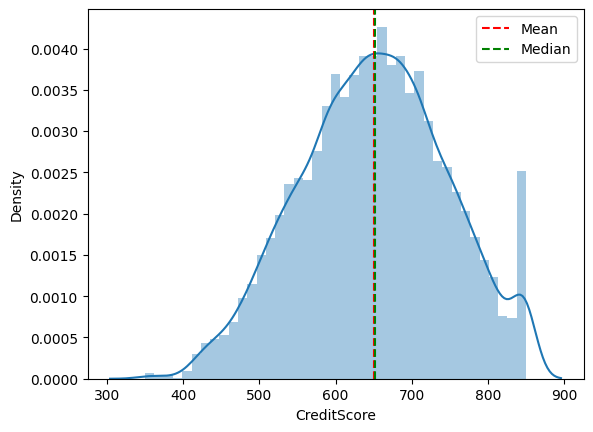

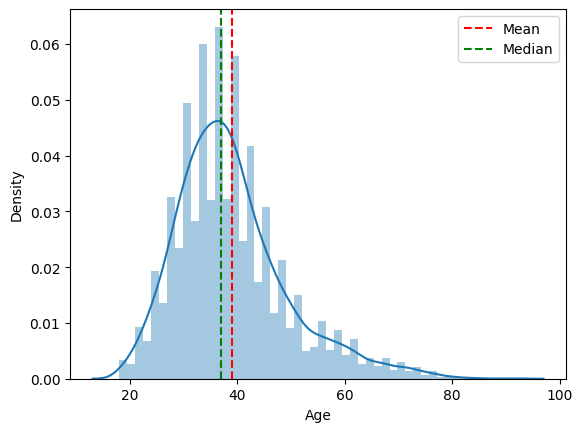

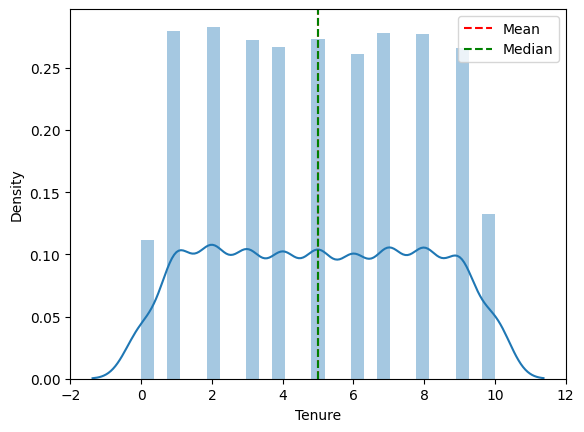

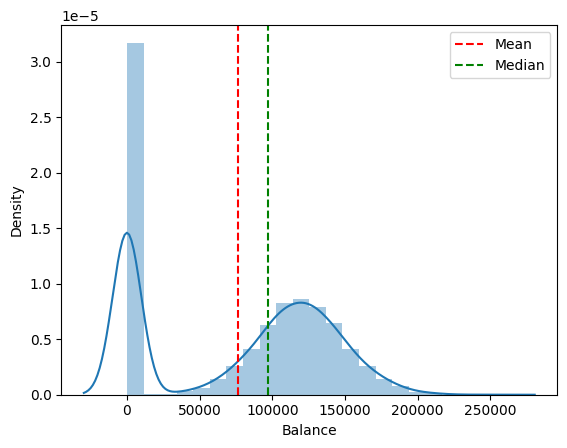

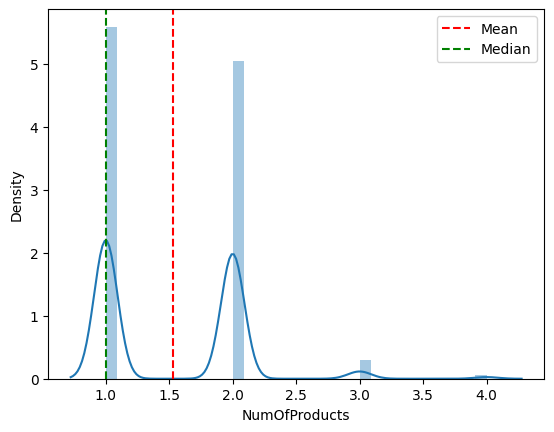

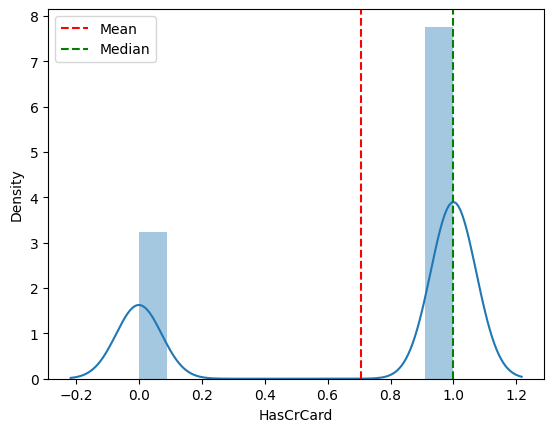

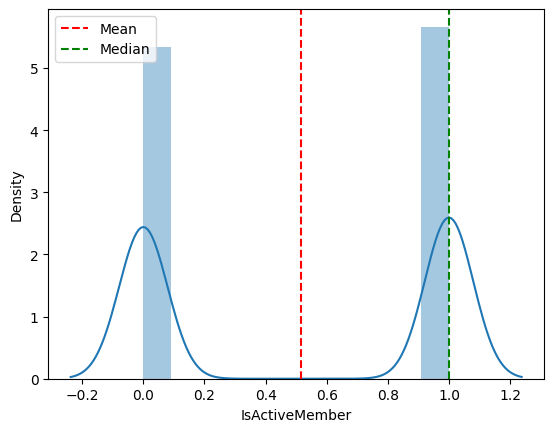

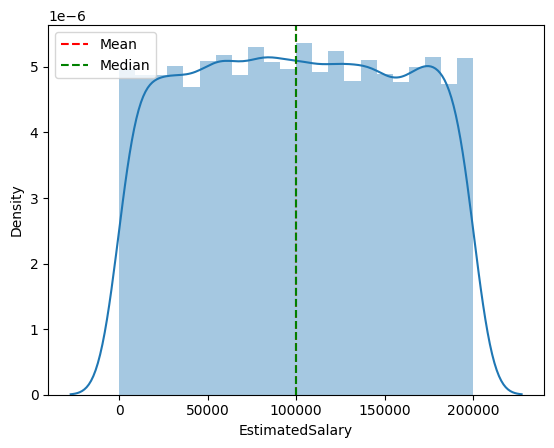

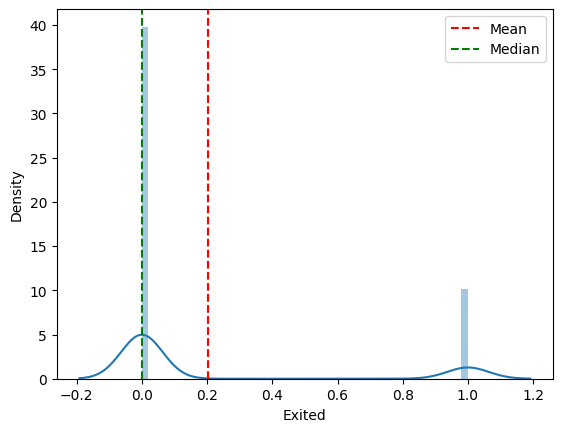

In [14]:
# create histogram of numerical columns using sns and kde=true
import matplotlib.pyplot as plt

for col in numeric_cols:
    sns.distplot(df[col], kde=True)
    plt.axvline(df[col].mean(), color='r', linestyle='--', label='Mean')
    plt.axvline(df[col].median(), color='g', linestyle='--', label='Median')
    plt.legend()
    plt.show()

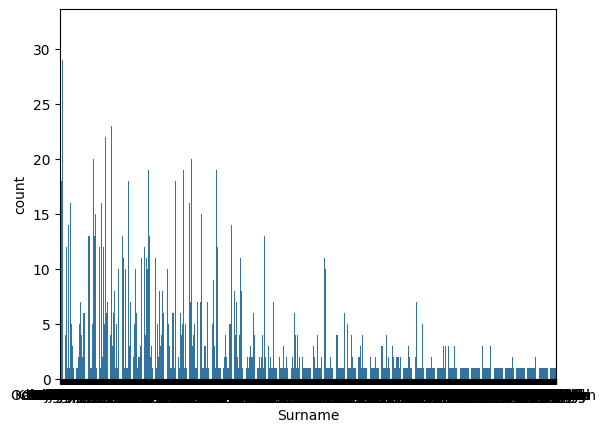

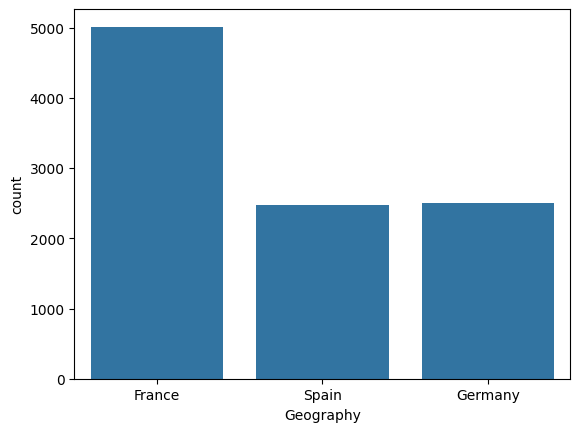

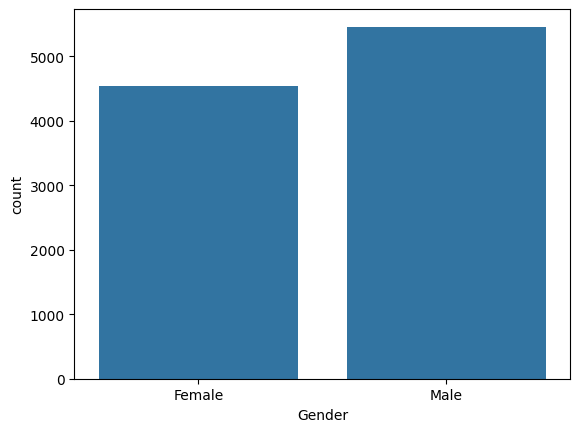

In [15]:
# create a count plot for each cat column
for col in categorical_cols:
    sns.countplot(df , x = df[col])
    plt.show()

In [16]:
# print the number of rows and columns
print(f"The train dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The train dataset has 10000 rows and 14 columns


In [17]:
# encode categorical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

In [18]:
df.head(5)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [19]:
# split the data into X and y
X = df.drop(['Exited',  'CustomerId', 'Surname'] , axis=1)
y = df['Exited']

In [20]:
X.head()


,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,619,0,0,42,2,0.00,1,1,1,101348.88
1,2,608,2,0,41,1,83807.86,1,0,1,112542.58
2,3,502,0,0,42,8,159660.80,3,1,0,113931.57
3,4,699,0,0,39,1,0.00,2,0,0,93826.63
4,5,850,2,0,43,2,125510.82,1,1,1,79084.10


In [21]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [22]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [23]:
# train test split the data
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

# Neural Network Architecture

Epoch 1/100
250/250 [==============================] - 6s 13ms/step - loss: 653.7936 - accuracy: 0.6586 - val_loss: 40.7987 - val_accuracy: 0.7660
Epoch 2/100
250/250 [==============================] - 2s 6ms/step - loss: 39.8037 - accuracy: 0.6802 - val_loss: 22.6385 - val_accuracy: 0.6315
Epoch 3/100
250/250 [==============================] - 1s 6ms/step - loss: 36.3584 - accuracy: 0.6796 - val_loss: 10.2233 - val_accuracy: 0.7165
Epoch 4/100
250/250 [==============================] - 2s 6ms/step - loss: 29.0430 - accuracy: 0.6714 - val_loss: 52.3867 - val_accuracy: 0.6295
Epoch 5/100
250/250 [==============================] - 1s 6ms/step - loss: 30.3061 - accuracy: 0.6756 - val_loss: 12.8875 - val_accuracy: 0.7715
Epoch 6/100
250/250 [==============================] - 3s 12ms/step - loss: 30.6647 - accuracy: 0.6811 - val_loss: 30.6257 - val_accuracy: 0.8030
Epoch 7/100
250/250 [==============================] - 2s 8ms/step - loss: 26.7253 - accuracy: 0.6729 - val_loss: 23.1024 - val

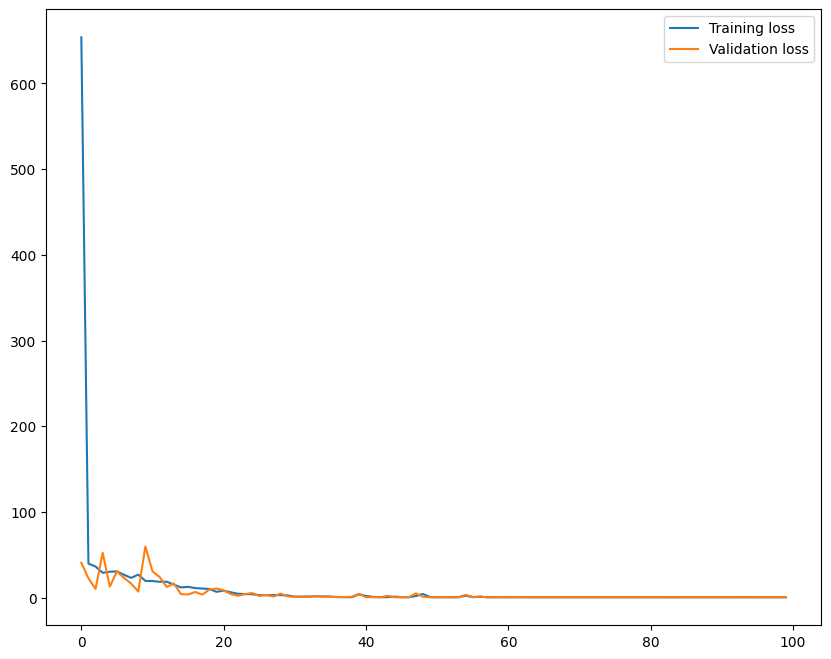

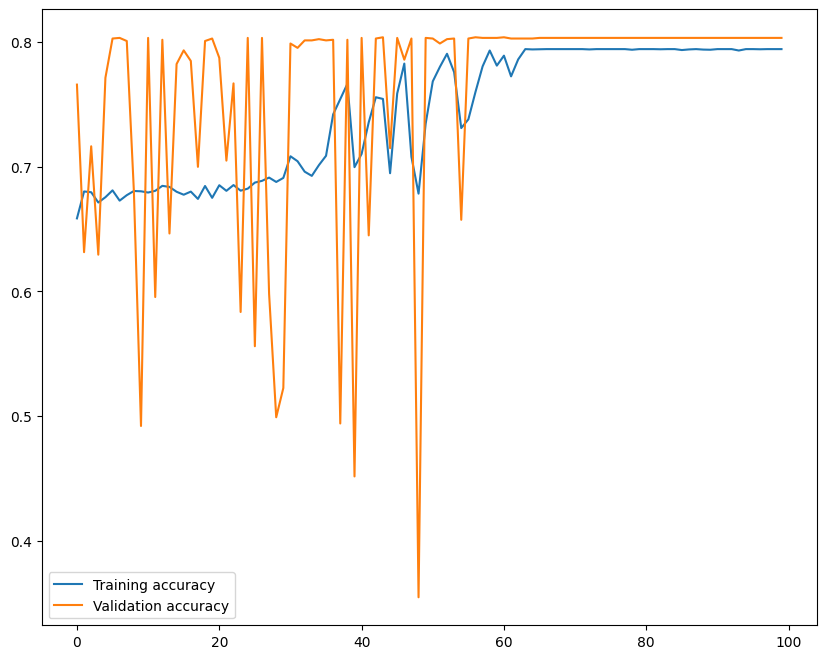

CPU times: total: 5min 2s
Wall time: 4min 8s


In [24]:
%%time
# create a deep neural network using tensorflow for binary classification
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', 
                          input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer 1
    tf.keras.layers.Dense(16, activation='relu'), # Hidden layer 2
    tf.keras.layers.Dense(8, activation='relu'), # Hidden layer 3
    
    tf.keras.layers.Dense(1, activation='sigmoid') # Output layer
])

# Define the callback function
early_stopping = EarlyStopping(patience=15)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test, y_test), 
                    callbacks=[early_stopping])

# plot the training and testing loss and accuracy at each epoc
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(history.history['loss'], label='Training loss')
ax.plot(history.history['val_loss'], label='Validation loss')
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(history.history['accuracy'], label='Training accuracy')
ax.plot(history.history['val_accuracy'], label='Validation accuracy')
ax.legend()
plt.show()

# XGB classifier

Accuracy score:  0.8565
Precision score:  0.8565
Recall score:  0.8565
F1 score:  0.8565


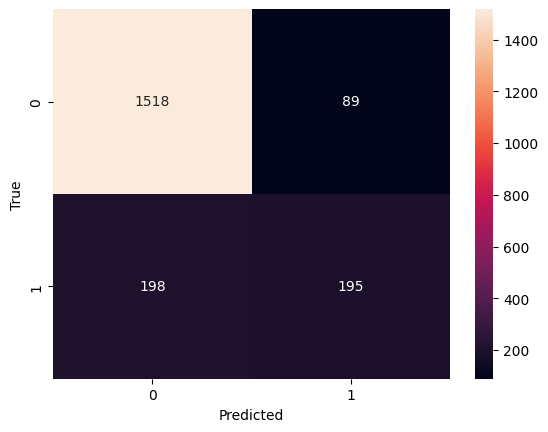

In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# train the xgboost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# predict the test data
y_pred = xgb.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

# plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()